# Basic Types of Algorithms

* Divide-and-Conquer Algorithms
* Greedy Algorithms
* Learn from pygorithm 

## 1. Divide and Conquer

A `divide-and-conquer` algorithm solves a problem by breaking it into subproblems, recursively solves the subproblems, and finally combines the solutions to the subproblems to solve the original problem.
* **divide** into subproblems
* **conquer** by solving the subproblems
* **combine** the answers to solve the original problem

<img src="./images/divide-and-conquer1.png" alt="Divide and Conquer" style="width: 450px;"/>
<center>Reference http://bigdata.ices.utexas.edu/project/divide-conquer-methods-for-big-data-analytics/</center>

#### Benefits
Some key benefits of using a divide and conquer approach:
* Speed – A well constructed divide and conquer algorithm is typically very fast.
* Simplifies Complexity - It breaks a complex topic down into small and easy to manage chunks, which is most likely easy to solve.

#### Applications
* Binary search
* Quick sort
* Merge sort

### Binary Search

Binary Search is a technique used to search element in a **sorted list**. The 2nd and 3rd case are repeating of main process and we can do it using recursive function. 
* If k = array[mid], the key k is found and we can return index.
* If k < array[mid], then the key k can appear only in the first half of the array.
* If k > array[mid], then the key k can appear only in the second half of the array.
* If array[] is empty, we have search all elements, so return -1 (not found).

<img src="./images/binary-search.jpg" alt="Divide and Conquer" style="width: 400px;"/>
<center>Reference https://algorithms.cs.aalto.fi/Teaching/CS-A1120/2018/notes/round-efficiency--binarysearch.html</center>

#### Approach 1: Return True/False

In [1]:
def binary_search(arr,item):
    if len(arr) == 0:
        return False
    m = len(arr)//2
    if item < arr[m]:
        return binary_search(arr[:m],item)
    elif item > arr[m]:
        return binary_search(arr[m+1:],item)
    else:
        return True

In [2]:
import random

arr = [random.randint(1,20) for i in range(20)]
arr.sort()
print(arr)

binary_search(arr, 10)

[2, 3, 4, 4, 4, 5, 5, 6, 7, 7, 9, 9, 9, 9, 10, 11, 12, 20, 20, 20]


True

#### Approach 2: Return Index

If we need to return the index value of found item, we cannot slice the original array in each recursion. We make use of `start` and `end` index to guide our search space.

In [3]:
def binary_search(arr, item, start=0, end=-1):
    if end == -1:
        end = len(arr) -1

    if start >= end:
        return -1

    mid = (start + end) // 2
    if item < arr[mid]:
        return binary_search(arr, item, start, mid)
    elif item > arr[mid]:
        return binary_search(arr, item, mid+1, end)
    else:
        return mid


In [4]:
import random

arr = [random.randint(1,20) for i in range(20)]
arr.sort()
print(arr)

binary_search(arr, 10)

[3, 4, 7, 9, 10, 10, 12, 12, 12, 14, 14, 15, 15, 15, 17, 17, 17, 19, 19, 20]


4

### Quick Sort

Quick Sort uses `divide-and-conquer` approach. 
* Select a 'pivot' element from the array, e.g. 1st element or middle element.
* Partition other elements into 3 sub-lists, according to whether they are less than, equal or greater than the pivot.
* The less-than and greater-than sub-lists are then sorted recursively.
* This can be done in-place, requiring small additional amounts of memory to perform the sorting.

<img src="images/quick_sort.png" width=240 />


#### Implementation

In [5]:
def quick_sort(unsorted):
    if len(unsorted) <= 1:
        return unsorted
    
    pivot = unsorted[0]
    
    equal  = [x for x in unsorted if x == pivot]
    lesser  = [x for x in unsorted if x < pivot]
    greater = [x for x in unsorted if x > pivot]
#     print('{}, {}, {}'.format(lesser, equal, greater))
    return quick_sort(lesser) + equal + quick_sort(greater)

In [6]:
import random

arr = [random.randint(1,20) for i in range(20)]
print(arr)
quick_sort(arr)

[19, 13, 11, 6, 9, 6, 11, 18, 5, 10, 17, 5, 18, 18, 17, 17, 14, 1, 19, 15]


[1, 5, 5, 6, 6, 9, 10, 11, 11, 13, 14, 15, 17, 17, 17, 18, 18, 18, 19, 19]

### Merge Sort

Like Quick Sort, Merge Sort is a Divide and Conquer algorithm too.

* Divide the unsorted list into n sublists, each containing one element (a list of one element is considered sorted).
* Repeatedly merge sublists to produce new sorted sublists until there is only one sublist remaining. This will be the sorted list.

<img src="images/merge_sort.png" width=400 />

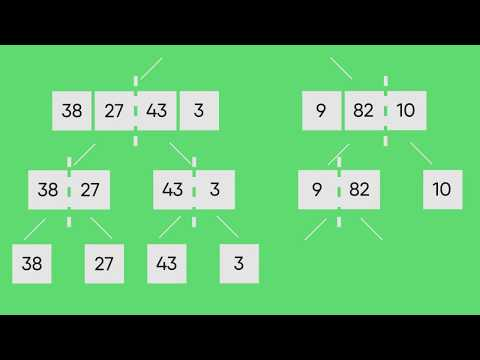

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(id='JSceec-wEyw', start=23, width=600, height=400)

#### Function to Merge Sorted Lists

Second phase of Merge Sort is to merge 2 sorted sublists into a single list. Let's implement a function `merge_sorted_lists()` for this purpose.

<table><tr>
<td> <img src="images/merge_sorted_lists_1.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="images/merge_sorted_lists_2.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>


In [8]:
def merge_sorted_lists(arr1, arr2):
    '''Merge 2 sorted lists'''
    result = []
    
    size1 = len(arr1) 
    size2 = len(arr2) 
    i, j = 0, 0

    while i < size1 and j < size2: 
        if arr1[i] < arr2[j]: 
            result.append(arr1[i]) 
            i = i + 1
        else: 
            result.append(arr2[j]) 
            j = j + 1

    return result + arr1[i:] + arr2[j:]

Test `merge_sorted_lists()` function.

In [9]:
arr1 = list(range(0,10,2))
arr2 = list(range(5,15,2))
print(arr1)
print(arr2)

merge_sorted_lists(arr1, arr2)

[0, 2, 4, 6, 8]
[5, 7, 9, 11, 13]


[0, 2, 4, 5, 6, 7, 8, 9, 11, 13]

#### Recursive Function for Merge Sort

In each recursion in Merge Sort, a large list is divided into 2 smaller sub-lists. Merge Sort is applied to both smaller sub-lists.
* Recursion ends when there is only 1 or 0 item in the list.
* Each call returns a sorted list.
* Result is obtained by merging 2 sorted sub-lists. 

In [10]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

#     print(arr)
    mid = len(arr)//2
    arr1 = merge_sort(arr[:mid])
    arr2 = merge_sort(arr[mid:])
    return merge_sorted_lists(arr1, arr2)

In [11]:
import random
arr = list(range(10))
random.shuffle(arr)
print(arr)

merge_sort(arr)

[7, 9, 4, 6, 1, 2, 8, 3, 5, 0]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 2. Greedy Algorithms (Optional)

### What is Greedy Algorithm?

Optimization problem is a problem of finding the best solution from all feasible solutions. 
There are 2 common techniques in solving optimization problems:
* Greedy Algorithms
* Dynamic Programming

Greedy Algorithm is a strategy to make a choice which seems the best at each step, and hopefully these steps will end up with an overall best solution to a problem.
* In each step, it always makes the choice that seems to be the best at that moment, i.e. **local optimal choice** or **greedy choice**.

Greedy Algorithms typically consist of:
* A set of choices
* A **selection function** which decides the most benefiting choice
* A function to check if selected choices constitute a solution

#### Approaches
Greedy algorithm considers all choices in a particular problem, and set a rule to decide which choice to choose to maximize benefit at each step. It iterates through the choices till problem solved.
* Understand problem and the set of choices
* Set the selection function to make choice which will bring maximum benefit
* At each step, add a choice for sub-problem based on the rule
    * Check if current set of choices provide a solution to the problem
    * Repeat until it reaches a solution

#### Examples
* [Largest Number from Digits](https://towardsdatascience.com/course-1-algorithmic-toolbox-part-2-big-o-and-greedy-6265d9065f05)
* [Minimum Coin Change problem](https://www.algoskills.com/g_coinchange.php)
* [Activity Selection problem](https://www.algoskills.com/activityselection.php)
* [Fractional Knapsack problem](https://www.algoskills.com/f_knapsack.php)

### Example 1: Largest Number from Digits

Find the largest integer number can be formed by a given set of digits.
* Reference: https://towardsdatascience.com/course-1-algorithmic-toolbox-part-2-big-o-and-greedy-6265d9065f05

**<u>Question</u>:** What is the largest number that consists of digits 3, 9, 5, 9, 7, 1? 

#### Analysis:
* The choice space are all digits: 3, 9, 5, 9, 7, 1
* Selection function is to select largest digit to be MSD (Most Significant Digit) so that final number is largest
* Solution will be found once all digits are utilized

In [12]:
digits = [3, 9, 5, 9, 7, 1]
choices = []

while len(digits)>0:
    x = max(digits)
    digits.remove(x)
    choices.append(x)
    print(choices)

result = int(''.join(str(c) for c in choices))
print(result)

[9]
[9, 9]
[9, 9, 7]
[9, 9, 7, 5]
[9, 9, 7, 5, 3]
[9, 9, 7, 5, 3, 1]
997531


#### A Simpler Solution?

In [13]:
digits = [3, 9, 5, 9, 7, 1]
result = ''.join(str(c) for c in sorted(digits,reverse=True))
result = int(result)
print(result)

997531


### Example 2: Minimum Coin Change

Find the minimum number of coins whose values are added up to a given amount of money.
* Reference: https://www.algoskills.com/g_coinchange.php

**<u>Question</u>:** Given unlimited number of coins of value 1, 5, 10, 20 and 50 cents. Find the minimum number of coins to pay `87` cents.

#### Analysis:
* The choice space are coins of all values: 1, 5, 10, 20, 50
* Selection function is to select coin of largest value first to minimize the number of coins required
* Solution will be found if total value of selected coins equals required amount


In [14]:
def min_coins(coins, amount):
    coins.sort(reverse=True)
    result = []
    for coin in coins:
        while amount >= coin:
            #while loop is needed since one coin can be used multiple times
            result.append(coin)
            amount = amount - coin
    return result

amount = 87
coins = [1,5,10,20,50]
min_coins(coins, amount)

[50, 20, 10, 5, 1, 1]

#### Does greedy algorithms always give optimal result?

If the coins available are of values `[5, 30, 50]`, what is the minimum number of coins to get amount of `60`? Does above greedy algorithm still give minimum number of coins?


In [15]:
amount = 60
coins = [5, 30, 50]
min_coins(coins, amount)

[50, 5, 5]

### Example 3: Activity Selection

Assume a meeting room can only hold one activity at a time, find the maximum number of meetings that can be hold in the meeting room for a period of time.
* Reference: https://www.algoskills.com/activityselection.php

**<u>Question</u>:** Given following meetings in the format of [meeting-name, start-time, end-time], schedule the meeting room with maximum number of meetings.

```
meetings = [['A',1,4],['C',2,3],['E',11,12],['D',7,12],['B',4,6]]
```

#### Analysis:
* The choice space are all potential meetings
* Selection function is to maximize the number of meetings for the meeting room, i.e. select meeting which has earlier end time so that there are more free time to pack more meetings
* Solution will be found when all meetings are processed

In [16]:
def activity_selection(events):
    ordered = sorted(events, key=lambda x: (x[2], x[1]))
    print(ordered)
    names = [x[0] for x in ordered]
    start = [x[1] for x in ordered]
    end = [x[2] for x in ordered]
    
    # index of selected activity; first activity is always selected
    i=0
    result = [names[i]]
    for j in range(1,len(names)):
        if(start[j] >= end[i]):
            result.append(names[j])
            i=j
    return result

meetings = [['A',1,4],['C',2,3],['E',11,12],['D',7,12],['B',4,6]]
print(meetings)
result = activity_selection(meetings);
print(result)

[['A', 1, 4], ['C', 2, 3], ['E', 11, 12], ['D', 7, 12], ['B', 4, 6]]
[['C', 2, 3], ['A', 1, 4], ['B', 4, 6], ['D', 7, 12], ['E', 11, 12]]
['C', 'B', 'D']


#### How are the meetings sorted?

In above example, we sort the meetings by end-time then start-time. 
* Objective is to pack as many meetings as possible.
* Earlier end time will get more free time to pack other meetings.
* No need to further sort by start-time if utilization of meeting room is not a concern.

#### What if the objective is to have highest meeting room utilization?

* Priority given to meetings with earlier start-time and longer duration.

### Example 4: Fractional Knapsack (Backpack) Problem

Given a bag with limited capacity and few objects with different weight and value, find the list of items which gives max value and can be fit into bag.
* Reference: https://algoskills.com/f_knapsack.php

**<u>Question</u>:** A thief robbing a store finds following items in the format of ['name', 'weight', 'value']. Each item has an associated value in dollars and a weight in kg. His backpack can only carry maximum 20 kg. What items should he take?

```
items = [['A',2,3],['B',5,2],['C',4,8],['D',7,3],['E',4,6]]
```

#### Analysis:
* The choise space are the list of items found
* Selection function is to select item is most worth to carry, i.e. dollar-per-kg is the highest 
* Solution will be found till it reach bag's capacity

In [17]:
items = [['A',2,3],['B',5,2],['C',4,8],['E',4,6],['D',8,2], ['F', 6,3]]
ordered = sorted(items, key=lambda x: (x[2]/x[1], x[1]), reverse=True)
print(ordered)

capacity = 20
weights = 0
values = 0
for i in ordered:
    if weights + i[1] > capacity:
        continue
    print(i[0], end=', ')
    weights = weights + i[1]
    values = values + i[2]

print('Total value = {}, total weight = {}'.format(values, weights))

[['C', 4, 8], ['E', 4, 6], ['A', 2, 3], ['F', 6, 3], ['B', 5, 2], ['D', 8, 2]]
C, E, A, F, Total value = 20, total weight = 16


#### Why use `continue` instead of `break` in `for-loop`?

* What will be the problem if `continue` is replaced by `break`?

### Other Applications

There are many other applications of greedy algorithms, especially algorithm for networking.

* [Huffman encoding](https://en.wikipedia.org/wiki/Huffman_coding), which is used to compress data
* [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm), which is used to find the shortest path through a graph.
* Travelling Salesman Problem
* Prim's Minimal Spanning Tree Algorithm
* Kruskal's Minimal Spanning Tree Algorithm

### Summary

* Greedy Algorithm makes the choice which seems the best at that moment and consequently solves the subproblems.
* It iteratively makes one greedy choice after another, reducing each given problem into a smaller one.
* It may NOT give an overall opital solution for problems, 

## 3. Learn from pygorithm (Optional)

The **[pygorithm](https://pygorithm.readthedocs.io/en/latest/)** is a open-source python module on [GitHub](https://github.com/OmkarPathak/pygorithm). 
* It helps you learn implementation of all major algorithms in Python. 
* You can get the code, time complexities and much more by just importing the required algorithm. 
* It covers implementation of all major algorithms in Python.

### Installation

Run following command to install `pygorithm`.

In [18]:
!pip install pygorithm

### Using an Algorithm

Import sorting module and check the algorithms implemented in the module


In [19]:
from pygorithm import sorting
help(sorting)

Help on package pygorithm.sorting in pygorithm:

NAME
    pygorithm.sorting - Collection of sorting methods

PACKAGE CONTENTS
    bubble_sort
    bucket_sort
    counting_sort
    heap_sort
    insertion_sort
    merge_sort
    quick_sort
    selection_sort
    shell_sort

DATA
    __all__ = ['bubble_sort', 'bucket_sort', 'counting_sort', 'heap_sort',...

FILE
    c:\users\zqi2\appdata\local\continuum\anaconda3\lib\site-packages\pygorithm\sorting\__init__.py




Try out `bubble_sort()` function.

In [20]:
import random
arr = random.sample(range(100),10)
print(arr)

sorting.bubble_sort.sort(arr)

[64, 97, 54, 46, 65, 25, 78, 55, 52, 73]


[25, 46, 52, 54, 55, 64, 65, 73, 78, 97]

### Get Source Code

Each algorithm comes with `get_code()` function, which returns implemented python code. 

In [21]:
code = sorting.bubble_sort.get_code()
print(code)

def sort(_list):
    """
    Bubble Sorting algorithm

    :param _list: list of values to sort
    :return: sorted values
    """
    for i in range(len(_list)):
        for j in range(len(_list) - 1, i, -1):
            if _list[j] < _list[j - 1]:
                _list[j], _list[j - 1] = _list[j - 1], _list[j]
    return _list



### Check Time Complexity

You can also find **time complexity** of each algorithm using its `time_complexities()` function.

In [22]:
info = sorting.bubble_sort.time_complexities()
print(info)

Best Case: O(n), Average Case: O(n ^ 2), Worst Case: O(n ^ 2).

For Improved Bubble Sort:
Best Case: O(n); Average Case: O(n * (n - 1) / 4); Worst Case: O(n ^ 2)


## Reference
* [algoskills](https://www.algoskills.com/home.php)
* [Khan Academy: Computer science Algorithms](https://www.khanacademy.org/computing/computer-science/algorithms)
* [Problem Solving with Algorithms and Data Structures](http://interactivepython.org/runestone/static/pythonds/index.html)
* [pygorithm](https://pygorithm.readthedocs.io/en/latest/)